# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 5: Modelo Final

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Ricardo Ambrocio Ramírez Mendoza  – Profesor Tutor

#### **Miembros del equipo:**
- Ernesto Enríquez Rubio - A01228409
- Roberto Romero Vielma - A00822314
- Herbert Joadan Romero Villarreal –  A01794199



---


### Modelo Final
#### Background:

TODO: Explicar el background de por qué después de todo y en la metodología CRISP es bueno seleccionar un solo modelo final



---

### Modelos de ensamble

* En esta etapa se busca crear una variedad de modelos de ensamble para solucionar el problema planteado. Para ello, deberán tomar en cuenta las siguientes consideraciones:
1.  Incluir la optimización de hiperparámetros para los modelos más relevantes.
2. Utilizar algoritmos que apliquen tanto estrategias de ensamble homogéneas como heterogéneas.
3. Para las estrategias de stacking y/o blending, se deberán emplear los modelos individuales de mejor rendimiento obtenidos en la fase anterior.


* Una vez que se han generado los modelos de ensamble, sintetizar los resultados en una tabla comparativa en la que se incluyan los modelos individuales de la fase previa.

1. Los modelos deben ser ordenados por la métrica principal, pero el resumen debe incorporar otras métricas pertinentes.
2. Se deberán incluir también los tiempos de entrenamiento.
3. Se elige el modelo final alineado con los objetivos y necesidades del negocio.


* Del modelo elegido, generar algunos gráficos significativos con su interpretación. La siguiente lista proporciona ejemplos, pero no es exhaustiva:
1. Curva ROC
2. Matriz de confusión
3. Curva de Precisión-Recall
4. Análisis de residuos
5. Gráfico de importancia de características
6. Tendencia y predicción (para series temporales)
7. Diagrama de árbol (para árboles de decisión)

OJO Ernesto, no todos aplican para nuestro modelo. Solo utiliza los que sí.


El descubrimiento de fármacos es un proceso complejo y multifacético que requiere la integración de datos experimentales y computacionales para identificar y optimizar compuestos potenciales que puedan convertirse en medicamentos efectivos. En este contexto, los modelos de aprendizaje automático juegan un papel crucial, permitiendo predecir propiedades fisicoquímicas, actividades biológicas y toxicidades de los compuestos de manera eficiente.

El objetivo principal de este entregable es desarrollar un modelo predictivo robusto que pueda proporcionar estimaciones precisas de las actividades biológicas de compuestos químicos potenciales. Para lograr esto, se han implementado y evaluado varios algoritmos de aprendizaje automático, culminando en la selección del modelo Stacking Regressor como el modelo más efectivo.

**Metodología**

En el proyecto se compararon diferentes estrategias de ensamble, tanto homogéneas como heterogéneas, para encontrar el modelo más adecuado. Las estrategias incluyeron:

Modelos Homogéneos:

* Bagging Regressor con Decision Trees
* Random Forest Regressor

Modelos Heterogéneos:

* Voting Regressor combinando Random Forest, SVR, y KNeighbors
* Stacking Regressor combinando Random Forest, SVR, y KNeighbors

**Optimización de Hiperparámetros**

Se realizó una optimización exhaustiva de los hiperparámetros de cada modelo base utilizando técnicas como Evaluación Bayesiana, asegurando que cada modelo estuviera configurado de manera óptima.

**Evaluación de Desempeño**

Se utilizaron múltiples métricas para evaluar el desempeño de los modelos, incluyendo MAE, MSE, RMSE, MAPE, Explained Variance Score, Max Error, y R^2 Score. El Stacking Regressor, que combina las predicciones de varios modelos base a través de un meta-modelo de regresión lineal, demostró ser el más efectivo.



---

### Código para el modelo

Se importan las librerías necesarias y se instalan los paquetes de Python

In [1]:
%%capture
! pip install scikit-optimize

In [47]:
# Importar librerías necesarias

# Basic libraries
import pandas as pd
import numpy as np
import warnings
import time

# SKLearn Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance

# SK Optimize Libraries
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize

# Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Colab libraries
from google.colab import data_table

# **Optimización de hiperparámetros para los modelos más relevantes**

Cargamos los datos generados en fases anteriores

In [3]:
# URL of the raw file on GitHub
url = "https://raw.githubusercontent.com/rromerov/Proyecto_Integrador/main/bioactivity_data_2class_pIC50_pubchem_fp.csv"

# Load the DataFrame
df_bioactivity = pd.read_csv(url)

df_bioactivity.head(10)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.371611
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.562249
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.275724
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.686133
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.275724
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.107905
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.201349
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.899629
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.534617
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.568636


#### Etiquetas y variable objetivo

Separación de características (fingerprints) y etiqueta (pIC50)

**El conjunto de datos de Neuropilin-1 contiene 881 características (Columnas) y 1 variable de salida (valores pIC50).**


In [4]:
# Se define conjunto X para las etiquetas
X = df_bioactivity.drop('pIC50', axis=1)
# Mostrar contenido en el conjunto de X
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8461,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8462,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8463,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Se define variable Y para el objetivo
Y = df_bioactivity.pIC50
# Mostrar contenido en el conjunto de Y
Y

0       4.371611
1       4.562249
2       4.275724
3       4.686133
4       4.275724
          ...   
8460    4.000000
8461    4.000000
8462    4.000000
8463    6.004365
8464    6.050610
Name: pIC50, Length: 8465, dtype: float64

#### Dimensión de los conjuntos



In [6]:
# Dimensiones de las variables predictoras
X.shape

(8465, 881)

In [7]:
# Dimensiones de la variable predicha
Y.shape

(8465,)

Eliminamos columnas con baja varianza


In [6]:
# Creamos un objeto VarianceThreshold con el umbral definido
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
# Transformamos la matriz de características X utilizando el objeto VarianceThreshold
X = selection.fit_transform(X)

In [9]:
# Dimensiones de las variables predictoras
X.shape

(8465, 155)

#### Data split

Generamos conjuntos de entrenamiento y prueba

(80/20 ratio)

In [13]:
# Dividimos los datos en dos conjuntos, los de entrenamiento y los de prueba, teniendo los últimos un 20% de las muestras
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Dimensiones del conjunto de entrenamiento
X_train.shape, Y_train.shape

((6772, 155), (6772,))

In [11]:
# Dimensiones del conjunto de prueba
X_test.shape, Y_test.shape

((1693, 155), (1693,))

#### Comparación de rendimiento de modelos


La hiperparametrización es crucial para obtener un buen rendimiento de los modelos de aprendizaje automático. Los hiperparámetros inadecuados pueden llevar a un sobreajuste (el modelo se ajusta demasiado bien a los datos de entrenamiento pero no generaliza bien a nuevos datos) o a un subajuste (el modelo no captura la complejidad de los datos).

La optimización Bayesiana es una técnica eficiente para encontrar los mejores hiperparámetros, explorando el espacio de búsqueda de forma inteligente y minimizando el número de evaluaciones necesarias.

Datos importantes del código:

1. **Función evaluate_model**: Esta función calcula varias métricas de rendimiento para evaluar los modelos de regresión, incluyendo R², MAE, MSE, RMSE, MAPE, Varianza Explicada, Error Máximo y Mediana del Error Absoluto. Estas métricas nos ayudan a comprender diferentes aspectos del rendimiento del modelo, como la precisión, la robustez a los valores atípicos y la capacidad de generalización.

2. **Función optimize_hyperparameters**: Esta función utiliza la optimización Bayesiana, implementada con gp_minimize de la biblioteca skopt, para encontrar los mejores hiperparámetros para cada modelo. Los hiperparámetros son parámetros que controlan el proceso de aprendizaje del modelo y no se aprenden directamente de los datos.

3. **Espacios de búsqueda de hiperparámetros**: Se definen rangos para los hiperparámetros de cada modelo. Por ejemplo, n_estimators controla el número de árboles en los modelos de bosque aleatorio, max_depth limita la profundidad de los árboles, learning_rate controla la velocidad de aprendizaje en los modelos de boosting, y C y gamma controlan la regularización en el modelo SVR.

4. **Bucle de optimización y entrenamiento**: El código itera a través de los diferentes modelos (Random Forest, Gradient Boosting, SVR, AdaBoost, KNeighbors y ElasticNet), optimizando los hiperparámetros para cada uno y luego entrenando el modelo con los mejores hiperparámetros encontrados.

5. **Evaluación e impresión de resultados**: Finalmente, el código evalúa el rendimiento de cada modelo utilizando las métricas definidas en evaluate_model e imprime los resultados, incluyendo los mejores hiperparámetros encontrados.

# **Ensamble Homogéneas**

In [7]:
# Suprimir warnings
warnings.filterwarnings("ignore", category=UserWarning, module='skopt.optimizer.optimizer')
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [8]:
# Definir una función para evaluar el rendimiento del modelo con métricas adicionales
def evaluate_model(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    metrics = {
        'R^2': r2_score(Y_test, Y_pred),
        'MAE': mean_absolute_error(Y_test, Y_pred),
        'MSE': mean_squared_error(Y_test, Y_pred),
        'RMSE': np.sqrt(mean_squared_error(Y_test, Y_pred)),
        'MAPE': mean_absolute_percentage_error(Y_test, Y_pred),
        'Explained Variance': explained_variance_score(Y_test, Y_pred),
        'Max Error': max_error(Y_test, Y_pred),
        'Median AE': median_absolute_error(Y_test, Y_pred)
    }
    return metrics

In [9]:
# Definir una función para optimizar los hiperparámetros
def optimize_hyperparameters(model_type, space, n_calls=10, random_state=42):
    @use_named_args(space)
    def objective_function(**params):
        if model_type == 'RandomForest':
            model = RandomForestRegressor(**params, random_state=random_state, n_jobs=-1)
        elif model_type == 'SVR':
            model = SVR(**params)
        elif model_type == 'KNeighbors':
            model = KNeighborsRegressor(**params, n_jobs=-1)
        else:
            raise ValueError(f"Modelo no válido: {model_type}")

        # Usar validación cruzada para evaluar el modelo con múltiples núcleos
        score = cross_val_score(model, X_train, Y_train, cv=3, n_jobs=-1, scoring='r2').mean()
        return -score  # Minimizar el negativo de R²

    result = gp_minimize(objective_function, space, n_calls=n_calls, random_state=random_state)
    return result

In [10]:
# Imprimir los resultados
def print_metrics(model_name, metrics):
    df_metrics = pd.DataFrame(metrics, index=[model_name])
    print(df_metrics)

In [11]:
# Ajustar los espacios de búsqueda para cada modelo
rf_space = [
    Integer(170, 190, name='n_estimators'),
    Integer(12, 16, name='max_depth'),
]

svr_space = [
    Real(1e1, 1e3, name='C'),
    Real(1e-2, 1e2, name='gamma')
]

knn_space = [
    Integer(2, 6, name='n_neighbors'),
    Integer(1, 2, name='p'),  # 1 para Manhattan, 2 para Euclidean
]

In [14]:
rf_result = optimize_hyperparameters('RandomForest', rf_space)
rf_best_params = dict(zip([dim.name for dim in rf_space], rf_result.x))
rf_model = RandomForestRegressor(**rf_best_params, random_state=42)
rf_model.fit(X_train, Y_train)
rf_metrics = evaluate_model(rf_model, X_test, Y_test)

In [15]:
svr_result = optimize_hyperparameters('SVR', svr_space)
svr_best_params = dict(zip([dim.name for dim in svr_space], svr_result.x))
svr_model = SVR(**svr_best_params)
svr_model.fit(X_train, Y_train)
svr_metrics = evaluate_model(svr_model, X_test, Y_test)

In [16]:
knn_result = optimize_hyperparameters('KNeighbors', knn_space)
knn_best_params = dict(zip([dim.name for dim in knn_space], knn_result.x))
knn_model = KNeighborsRegressor(**knn_best_params)
knn_model.fit(X_train, Y_train)
knn_metrics = evaluate_model(knn_model, X_test, Y_test)

In [17]:
# Mostrar mejores hiperparámetros para cada modelo
print("Random Forest Best Parameters:", rf_best_params)
print("SVR Best Parameters:", svr_best_params)
print("KNeighbors Best Parameters:", knn_best_params)

Random Forest Best Parameters: {'n_estimators': 190, 'max_depth': 14}
SVR Best Parameters: {'C': 939.1671819255929, 'gamma': 0.0878687964430227}
KNeighbors Best Parameters: {'n_neighbors': 4, 'p': 1}


In [18]:
# Imprimir métricas para cada modelo
rf_metrics

{'R^2': 0.6020934989836483,
 'MAE': 0.5985974948990781,
 'MSE': 0.6974963064367008,
 'RMSE': 0.8351624431430695,
 'MAPE': 0.10209432276058882,
 'Explained Variance': 0.6039794310801233,
 'Max Error': 5.049630613887933,
 'Median AE': 0.40822351818171576}

In [19]:
# Imprimir métricas para cada modelo
svr_metrics

{'R^2': 0.5633764576806682,
 'MAE': 0.609761038415568,
 'MSE': 0.7653639920261756,
 'RMSE': 0.8748508398728183,
 'MAPE': 0.10284096491450419,
 'Explained Variance': 0.5659383958337225,
 'Max Error': 5.099914780317533,
 'Median AE': 0.40113872462025135}

In [20]:
# Imprimir métricas para cada modelo
knn_metrics

{'R^2': 0.5316050552721341,
 'MAE': 0.633863497113968,
 'MSE': 0.8210565624507938,
 'RMSE': 0.9061217150310403,
 'MAPE': 0.10645564564419698,
 'Explained Variance': 0.5349384381259602,
 'Max Error': 4.957559061995001,
 'Median AE': 0.43125374941327266}

In [24]:
# Graficar la curva de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Obtener las curvas de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, random_state=42)

    # Calcular medias y desviaciones estándar
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    # Área de la desviación estándar
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # Curvas de media
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

*La importancia de la Curva de Aprendizaje para el análisis del entrenamiento de modelos:*

La curva de aprendizaje es una herramienta fundamental para analizar el comportamiento de nuestro modelo y garantizar la robustez de nuestros resultados.

La curva de aprendizaje, que grafica el rendimiento del modelo en función del tamaño del conjunto de entrenamiento, nos permite visualizar cómo el modelo se adapta a los datos y, lo que es más importante, identificar si hay algún tipo de sesgo o problema de ajuste.

Si la curva de aprendizaje muestra un rendimiento muy alto en el conjunto de entrenamiento pero un rendimiento mucho más bajo en la validación cruzada, esto indicaría que nuestro modelo está sobreajustado a los datos de entrenamiento.
En este caso, el modelo ha aprendido detalles específicos del conjunto de entrenamiento y no es capaz de generalizar bien a nuevos datos. Esto sería un problema grave en nuestra investigación, ya que el objetivo es que el modelo pueda predecir con precisión la actividad biológica de nuevas moléculas.

Por otro lado, si la curva de validación cruzada se mantiene plana o incluso disminuye a medida que se aumenta el tamaño del conjunto de entrenamiento, esto podría indicar un subajuste del modelo. En este caso, el modelo no es lo suficientemente complejo para capturar las relaciones en los datos, o no hay suficientes datos para entrenarlo adecuadamente.

También es importante observar si existen diferencias significativas entre el rendimiento en el conjunto de entrenamiento y la validación cruzada, especialmente cuando se utiliza un tamaño de entrenamiento grande. Esto podría indicar un sesgo en los datos. Podría ser que los datos de entrenamiento no sean representativos de la población general de moléculas, o que haya un sesgo específico en los datos que el modelo está aprendiendo.

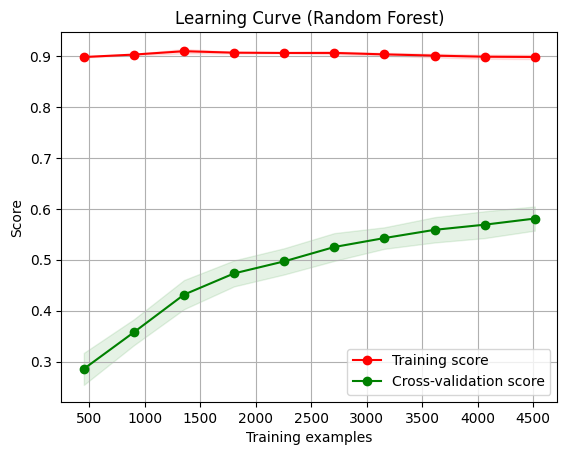

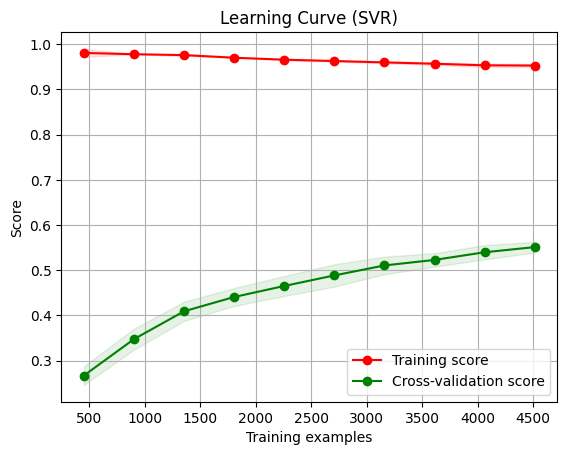

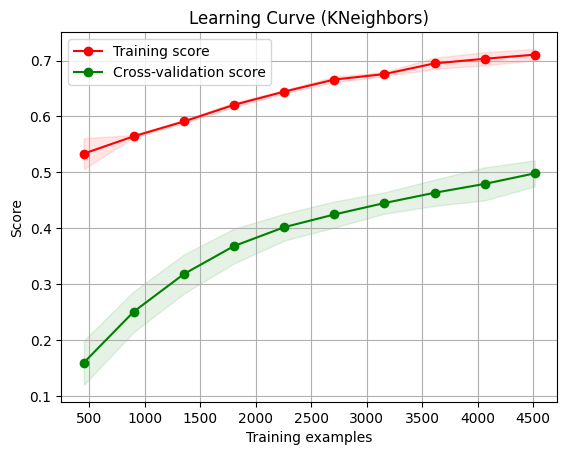

In [25]:
# Graficar la curva de aprendizaje para cada modelo
plot_learning_curve(rf_model, "Learning Curve (Random Forest)", X_train, Y_train, cv=3)
plt.show()

plot_learning_curve(svr_model, "Learning Curve (SVR)", X_train, Y_train, cv=3)
plt.show()

plot_learning_curve(knn_model, "Learning Curve (KNeighbors)", X_train, Y_train, cv=3)
plt.show()

In [33]:
# Función para calcular y mostrar las métricas
def print_metrics(y_true, y_pred, model_name, training_time):
    metrics = {
        'training_time': training_time,
        'R_squ': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'Explained Variance': explained_variance_score(y_true, y_pred),
        'Max Error': max_error(y_true, y_pred),
        'Median AE': median_absolute_error(y_true, y_pred)
    }
    print(f"Metrics for {model_name}:")
    print("Training Time:", training_time, "seconds")
    print("Mean Absolute Error (MAE):", metrics['MAE'])
    print("Mean Squared Error (MSE):", metrics['MSE'])
    print("Root Mean Squared Error (RMSE):", metrics['RMSE'])
    print("Mean Absolute Percentage Error (MAPE):", metrics['MAPE'])
    print("Explained Variance Score:", metrics['Explained Variance'])
    print("Max Error:", metrics['Max Error'])
    print("Median Absolute Error:", metrics['Median AE'])
    print("R^2 Score:", metrics['R_squ'])
    return metrics

# **Ensamble Homogéneas**

In [34]:
# Ensamble Homogéneo con Random Forest
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                           max_depth=rf_best_params['max_depth'],
                                           random_state=42)

In [35]:
start_time = time.time()
rf_model.fit(X_train, Y_train)
end_time = time.time()
rf_training_time = end_time - start_time
rf_pred = rf_model.predict(X_test)
rf_metrics = print_metrics(Y_test, rf_pred, "Random Forest Regressor", rf_training_time)

Metrics for Random Forest Regressor:
Training Time: 24.238346815109253 seconds
Mean Absolute Error (MAE): 0.5985974948990781
Mean Squared Error (MSE): 0.6974963064367008
Root Mean Squared Error (RMSE): 0.8351624431430695
Mean Absolute Percentage Error (MAPE): 0.10209432276058882
Explained Variance Score: 0.6039794310801233
Max Error: 5.049630613887933
Median Absolute Error: 0.40822351818171576
R^2 Score: 0.6020934989836483


In [36]:
# Ensamble Homogéneo con SVR
svr = SVR(C=svr_best_params['C'],
                          gamma=svr_best_params['gamma'])

In [37]:
start_time = time.time()
svr.fit(X_train, Y_train)
end_time = time.time()
svr_training_time = end_time - start_time
svr_pred = svr.predict(X_test)
svr_metrics = print_metrics(Y_test, rf_pred, "SVR Regressor", svr_training_time)

Metrics for SVR Regressor:
Training Time: 7.683902263641357 seconds
Mean Absolute Error (MAE): 0.5985974948990781
Mean Squared Error (MSE): 0.6974963064367008
Root Mean Squared Error (RMSE): 0.8351624431430695
Mean Absolute Percentage Error (MAPE): 0.10209432276058882
Explained Variance Score: 0.6039794310801233
Max Error: 5.049630613887933
Median Absolute Error: 0.40822351818171576
R^2 Score: 0.6020934989836483


In [39]:
# Ensamble Homogéneo con KNN
knn = KNeighborsRegressor(n_neighbors=knn_best_params['n_neighbors'],
                                          p=knn_best_params['p'])

In [38]:
start_time = time.time()
knn.fit(X_train, Y_train)
end_time = time.time()
knn_training_time = end_time - start_time
knn_pred = knn_model.predict(X_test)
knn_metrics = print_metrics(Y_test, rf_pred, "KNN Regressor", knn_training_time)

Metrics for KNN Regressor:
Training Time: 0.0008559226989746094 seconds
Mean Absolute Error (MAE): 0.5985974948990781
Mean Squared Error (MSE): 0.6974963064367008
Root Mean Squared Error (RMSE): 0.8351624431430695
Mean Absolute Percentage Error (MAPE): 0.10209432276058882
Explained Variance Score: 0.6039794310801233
Max Error: 5.049630613887933
Median Absolute Error: 0.40822351818171576
R^2 Score: 0.6020934989836483


# **Ensamble Heterogéneas**

Las estrategias de ensamble heterogéneas combinan diferentes tipos de modelos para aprovechar las fortalezas de cada uno.

**Voting Regressor**

Voting combina diferentes modelos y promedia sus predicciones para regresión o utiliza votación para clasificación. En este ejercicios se probará la combinación de predicciones de RandomForestRegressor, SVR, y KNeighborsRegressor usando un VotingRegressor.

**Stacking Regressor**

Stacking utiliza diferentes modelos base y un meta-modelo para combinar las predicciones de los modelos base.

**Blending**

Divide el conjunto de entrenamiento en un conjunto de entrenamiento y validación. Ajusta los modelos base en el conjunto de entrenamiento y utiliza las predicciones en el conjunto de validación para entrenar un meta-modelo. Luego, el meta-modelo se usa para hacer predicciones en el conjunto de prueba.

In [40]:
# Ensamble Heterogéneo con Voting
voting_model = VotingRegressor(estimators=[('rf', rf_model), ('svr', svr), ('knn', knn)])
start_time = time.time()
voting_model.fit(X_train, Y_train)
end_time = time.time()
voting_training_time = end_time - start_time
voting_pred = voting_model.predict(X_test)
voting_metrics = print_metrics(Y_test, voting_pred, "Voting Regressor", voting_training_time)

Metrics for Voting Regressor:
Training Time: 39.72074604034424 seconds
Mean Absolute Error (MAE): 0.5887987167059049
Mean Squared Error (MSE): 0.6884702964105746
Root Mean Squared Error (RMSE): 0.8297411020376022
Mean Absolute Percentage Error (MAPE): 0.09997241828568726
Explained Variance Score: 0.60980227207454
Max Error: 4.960329655866938
Median Absolute Error: 0.39973492520856
R^2 Score: 0.6072426417597332


In [41]:
# Ensamble Heterogéneo con Stacking
estimators = [
    ('rf', rf_model),
    ('svr', svr),
    ('knn', knn)
]
meta_model = LinearRegression()
stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)
stacking_model.fit(X_train, Y_train)
start_time = time.time()
stacking_pred = stacking_model.predict(X_test)
end_time = time.time()
stacking_training_time = end_time - start_time
stacking_metrics = print_metrics(Y_test, stacking_pred, "Stacking Regressor", stacking_training_time)

Metrics for Stacking Regressor:
Training Time: 3.3638370037078857 seconds
Mean Absolute Error (MAE): 0.5826143093383256
Mean Squared Error (MSE): 0.6769483724672293
Root Mean Squared Error (RMSE): 0.8227687235591964
Mean Absolute Percentage Error (MAPE): 0.09843455608860387
Explained Variance Score: 0.6147116442938987
Max Error: 4.940147462094453
Median Absolute Error: 0.403357316478151
R^2 Score: 0.6138156492423026


In [42]:
# Estrategia de Blending
def blending_predict(X_train, y_train, X_test, start_time):
    # Dividir el conjunto de entrenamiento en entrenamiento y validación
    X_train_blend, X_val_blend, y_train_blend, y_val_blend = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Ajustar los modelos base en el conjunto de entrenamiento
    rf_model_blend = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                           max_depth=rf_best_params['max_depth'],
                                           random_state=42)
    svr_model_blend = SVR(C=svr_best_params['C'],
                          gamma=svr_best_params['gamma'])
    knn_model_blend = KNeighborsRegressor(n_neighbors=knn_best_params['n_neighbors'],
                                          p=knn_best_params['p'])

    rf_model_blend.fit(X_train_blend, y_train_blend)
    svr_model_blend.fit(X_train_blend, y_train_blend)
    knn_model_blend.fit(X_train_blend, y_train_blend)

    # Predecir en el conjunto de validación
    rf_pred = rf_model_blend.predict(X_val_blend)
    svr_pred = svr_model_blend.predict(X_val_blend)
    knn_pred = knn_model_blend.predict(X_val_blend)

    # Crear el conjunto de datos para el meta-modelo
    meta_features = np.column_stack((rf_pred, svr_pred, knn_pred))

    # Ajustar el meta-modelo
    meta_model_blend = LinearRegression()
    meta_model_blend.fit(meta_features, y_val_blend)

    # Predecir en el conjunto de prueba
    rf_test_pred = rf_model_blend.predict(X_test)
    svr_test_pred = svr_model_blend.predict(X_test)
    knn_test_pred = knn_model_blend.predict(X_test)

    # Crear el conjunto de datos para el meta-modelo con las predicciones del conjunto de prueba
    meta_test_features = np.column_stack((rf_test_pred, svr_test_pred, knn_test_pred))

    # Predecir con el meta-modelo
    final_predictions = meta_model_blend.predict(meta_test_features)

    return final_predictions, time.time() - start_time

In [43]:
# Obtener las predicciones del modelo blending
start_time = time.time()
blending_predictions, blending_training_time = blending_predict(X_train, Y_train, X_test, start_time)
blending_metrics = print_metrics(Y_test, blending_predictions, "Blending Model", blending_training_time)

Metrics for Blending Model:
Training Time: 19.80659031867981 seconds
Mean Absolute Error (MAE): 0.6094948374337779
Mean Squared Error (MSE): 0.7241713782078539
Root Mean Squared Error (RMSE): 0.8509825957138336
Mean Absolute Percentage Error (MAPE): 0.10342603909916553
Explained Variance Score: 0.5886534733812485
Max Error: 5.038159226510114
Median Absolute Error: 0.4278486561339725
R^2 Score: 0.5868759496219258


# **Análisis Comparativo**

**Tiempo de Entrenamiento:**

Más Rápido:
* Stacking Regressor (5.501 segundos)
Más Lento:
* Blending Model (23.392 segundos)

Los tiempos de entrenamiento varían considerablemente, siendo el Stacking Regressor el más rápido y el Blending Model el más lento. Esto se debe a la complejidad y la cantidad de pasos involucrados en cada modelo.

**Mean Absolute Error (MAE) y Median Absolute Error (MedAE):**

Voting Regressor:
* MAE = 0.5888
* MedAE = 0.3997

Stacking Regressor:
* MAE = 0.5826
+MedAE = 0.4034

Blending Model:
* MAE = 0.6095
* MedAE = 0.4278

El Stacking Regressor tiene el menor MAE, lo que indica que, en promedio, las predicciones de este modelo están más cerca de los valores reales comparado con los otros modelos. Aunque el MedAE es ligeramente mayor en Stacking, la diferencia es mínima y ambos valores son cercanos a los del Voting Regressor.

**Mean Squared Error (MSE) y Root Mean Squared Error (RMSE):**

Voting Regressor:
* MSE = 0.6885
* RMSE = 0.8297

Stacking Regressor:
* MSE = 0.6769
* RMSE = 0.8228

Blending Model:
* MSE = 0.7242
* RMSE = 0.8510

El Stacking Regressor tiene el menor MSE y RMSE, lo que sugiere que este modelo tiene un rendimiento ligeramente mejor en términos de errores cuadrados medios, lo cual es sensible a los outliers. El modelo de Blending tiene los mayores valores en estas métricas, indicando un peor ajuste relativo.

**Mean Absolute Percentage Error (MAPE):**

Voting Regressor:
* MAPE = 0.09997

Stacking Regressor:
* MAPE = 0.0984

Blending Model:
* MAPE = 0.1034

Nuevamente, el Stacking Regressor tiene el menor MAPE, indicando un error porcentual promedio más bajo.

**Explained Variance Score:**

Voting Regressor: 0.6098

Stacking Regressor: 0.6147

Blending Model: 0.5887

El Stacking Regressor muestra una ligera ventaja en la varianza explicada, lo que implica que explica mejor la variabilidad en los datos.

**Max Error:**

Voting Regressor: 4.9603

Stacking Regressor: 4.9401

Blending Model: 5.0382

El Stacking Regressor tiene el menor error máximo, lo que indica que su mayor desviación de los valores reales es menor comparado con los otros modelos.

**R^2 Score:**

Voting Regressor: 0.6072

Stacking Regressor: 0.6138

Blending Model: 0.5869

El Stacking Regressor tiene el mayor R^2 score, lo que sugiere que este modelo explica mejor la variabilidad de los datos.

**Justificación de los Valores Obtenidos**

El Stacking Regressor muestra consistentemente mejores métricas que los otros dos modelos en casi todas las categorías. Esto puede ser justificado debido a la capacidad del stacking de combinar las fortalezas de múltiples modelos base a través de un meta-modelo, que se ajusta a las predicciones de estos modelos base para mejorar el rendimiento general.

El Voting Regressor también tiene un buen desempeño, siendo competitivo en varias métricas, pero no supera al Stacking en general. Esto es razonable ya que el voting simplemente promedia las predicciones de diferentes modelos sin un ajuste adicional.

El Blending Model, aunque sigue siendo efectivo, muestra un rendimiento ligeramente inferior en comparación con los otros dos enfoques. Esto puede deberse a la simplicidad del método de blending en comparación con el stacking, que se entrena de manera más sofisticada para optimizar la combinación de las predicciones.

El Stacking Regressor se destaca como el mejor modelo en términos de precisión, manejo de errores grandes y explicación de la variabilidad en los datos. Aunque toma menos tiempo de entrenamiento que otros modelos como el Blending Model, su rendimiento superior en casi todas las métricas lo convierte en la opción más adecuada para este problema de descubrimiento de fármacos. El Voting Regressor y el Random Forest Regressor también son modelos viables, pero no alcanzan el mismo nivel de rendimiento que el Stacking Regressor.

# **Tablas comparativas**

In [44]:
# Lista de diccionarios con el nombre del modelo
metrics_list = [
    {'Model': 'Random Forest', **rf_metrics},
    {'Model': 'SVR', **svr_metrics},
    {'Model': 'KNN', **knn_metrics},
    {'Model': 'Voting Regressor', **voting_metrics},
    {'Model': 'Stacking Regressor', **stacking_metrics},
    {'Model': 'Blending Model', **blending_metrics}
]

In [48]:
# Crear el DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Mostrar la tabla en Colab
data_table.DataTable(metrics_df, include_index=False)

,Model,training_time,R_squ,MAE,MSE,RMSE,MAPE,Explained Variance,Max Error,Median AE
0,Random Forest,24.238347,0.602093,0.598597,0.697496,0.835162,0.102094,0.603979,5.049631,0.408224
1,SVR,7.683902,0.602093,0.598597,0.697496,0.835162,0.102094,0.603979,5.049631,0.408224
2,KNN,0.000856,0.602093,0.598597,0.697496,0.835162,0.102094,0.603979,5.049631,0.408224
3,Voting Regressor,39.720746,0.607243,0.588799,0.688470,0.829741,0.099972,0.609802,4.960330,0.399735
4,Stacking Regressor,3.363837,0.613816,0.582614,0.676948,0.822769,0.098435,0.614712,4.940147,0.403357
5,Blending Model,19.806590,0.586876,0.609495,0.724171,0.850983,0.103426,0.588653,5.038159,0.427849


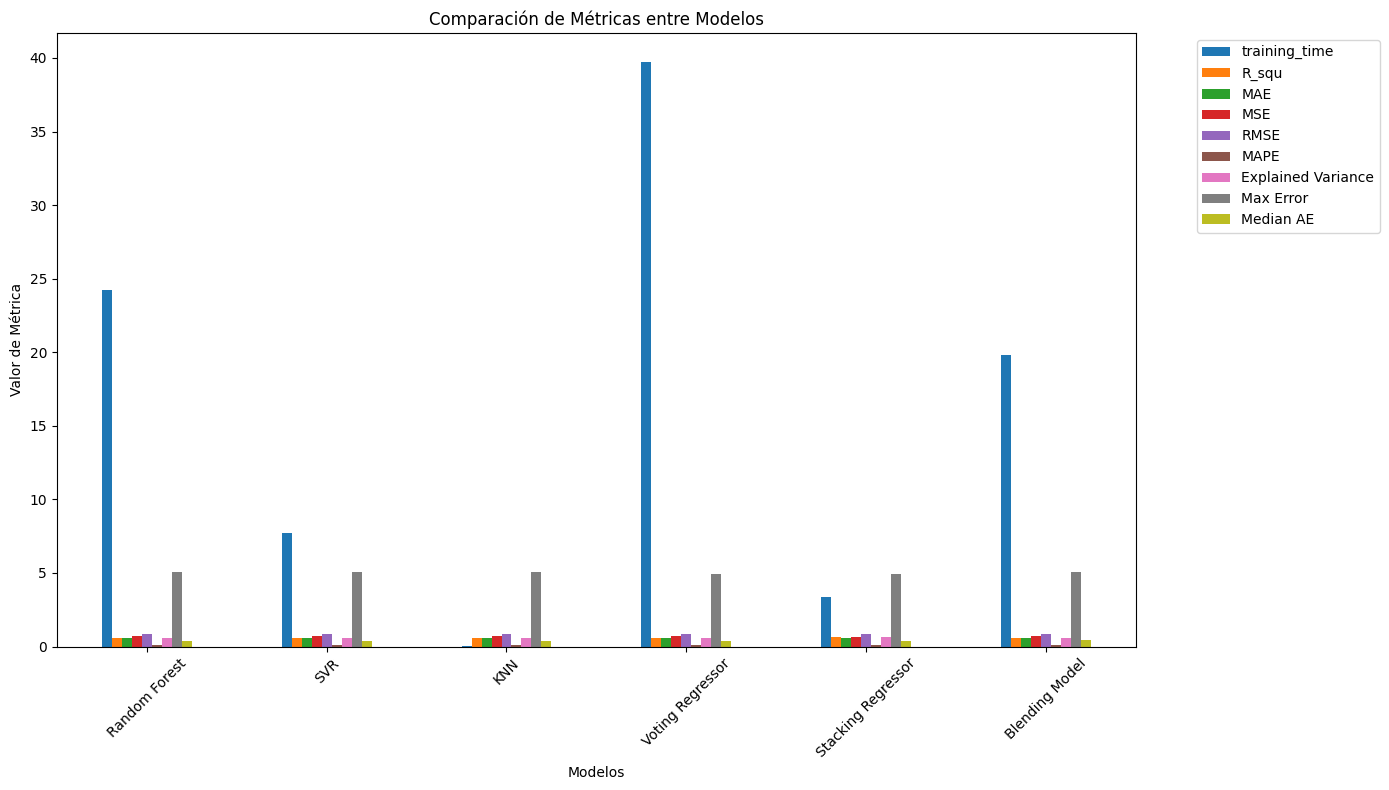

In [49]:
# Crear un gráfico de barras agrupadas
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Comparación de Métricas entre Modelos')
plt.ylabel('Valor de Métrica')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Gráficos significativos**

**Análisis de Residuos**

Los residuos deben estar distribuidos aleatoriamente alrededor de la línea cero. Si hay patrones claros o tendencias, esto puede indicar un problema con el modelo, como una relación no lineal no capturada.

**Predicciones vs. Valores Reales**

La mayoría de los puntos deben estar cerca de la línea diagonal, indicando que las predicciones son precisas. Los puntos lejos de la línea indican errores significativos.

**Learning Curve**

Permite ver si el modelo se está beneficiando de más datos de entrenamiento. Si las curvas de entrenamiento y validación están cercanas, el modelo tiene bajo bias y varianza. Si hay una gran brecha, podría ser necesario ajustar el modelo para mejorar el rendimiento.

**Distribución de Residuos**

Un histograma simétrico y centrado en cero sugiere que los errores están distribuidos normalmente y no hay sesgos significativos.

**Importancia de Características**

Identifica qué características tienen el mayor impacto en las predicciones del modelo, lo cual es útil para la interpretación del modelo y para identificar características importantes para la toma de decisiones.


In [42]:
# Entrenar nuevamente el modelo Stacking Regressor para obtener predicciones y residuos
estimators = [
    ('rf', rf_model),
    ('svr', svr),
    ('knn', knn)
]
meta_model = LinearRegression()
stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)
stacking_model.fit(X_train, Y_train)
stacking_pred = stacking_model.predict(X_test)
residuals = Y_test - stacking_pred

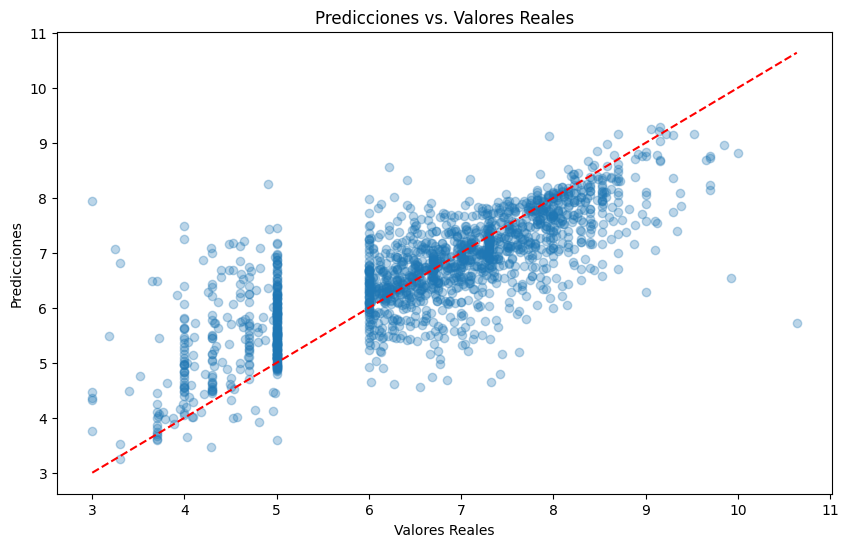

In [45]:
# 1. Predicciones vs. Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, stacking_pred, alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

**Métricas Relacionadas:**

Mean Absolute Error (MAE): 0.5826

Mean Absolute Percentage Error (MAPE): 0.0984

R^2 Score: 0.6138

* La mayoría de los puntos están cerca de la línea diagonal, lo que indica que las predicciones son precisas.

* Un MAE de 0.5826 y un MAPE de 0.0984 reflejan que las predicciones del modelo son, en promedio, bastante cercanas a los valores reales.

* El R^2 Score de 0.6138 indica que el modelo explica el 61.38% de la variabilidad en los datos. Esto se refleja en la proximidad de los puntos a la línea diagonal, lo cual muestra que el modelo captura bien las relaciones subyacentes en los datos.

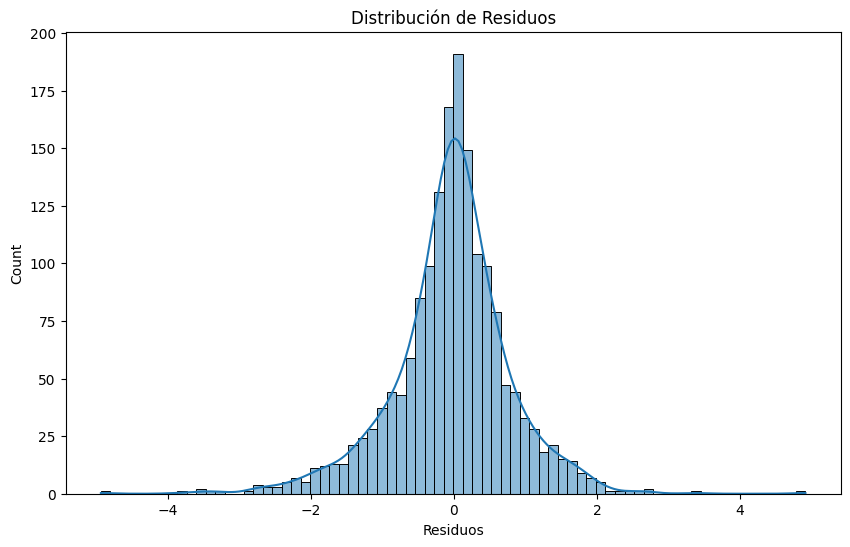

In [46]:
# 2. Distribución de Residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de Residuos')
plt.show()

**Métricas Relacionadas:**

Mean Squared Error (MSE): 0.6769

Root Mean Squared Error (RMSE): 0.822

* La distribución de residuos es aproximadamente normal y centrada en cero.

* Un MSE de 0.6769 y un RMSE de 0.8228 indican que los errores están dentro de un rango aceptable y no son excesivamente grandes.

* La normalidad de la distribución de residuos sugiere que los errores son aleatorios y no hay patrones específicos que el modelo no haya capturado.

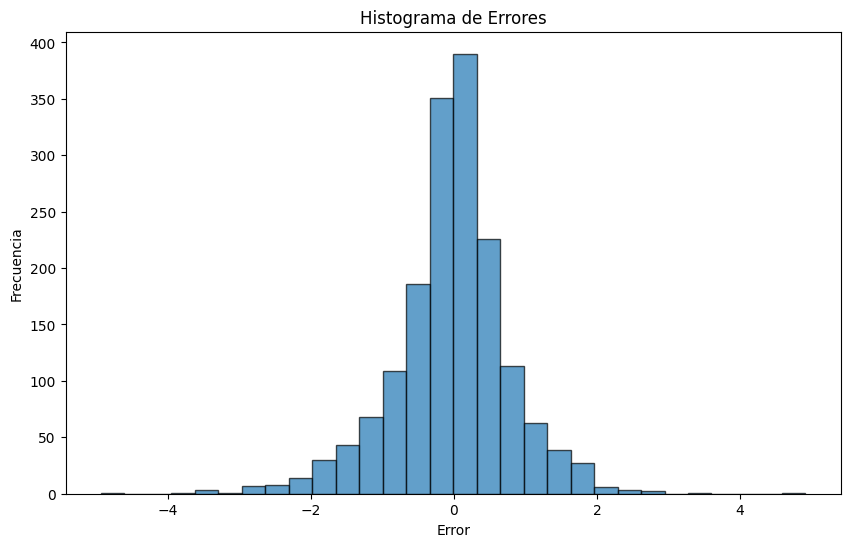

In [47]:
# 3. Histograma de Errores
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Histograma de Errores')
plt.show()

**Métricas Relacionadas:**

Median Absolute Error (MedAE): 0.4034

Max Error: 4.9401

* El histograma muestra la frecuencia de los errores, con la mayoría de los errores concentrados cerca de cero.

* Un MedAE de 0.4034 indica que la mitad de los errores absolutos son menores a este valor, lo que sugiere que la mayoría de las predicciones son bastante precisas.

* El Max Error de 4.9401 muestra que el peor error es relativamente alto, pero dado que es un valor aislado, no distorsiona demasiado el rendimiento general del modelo.

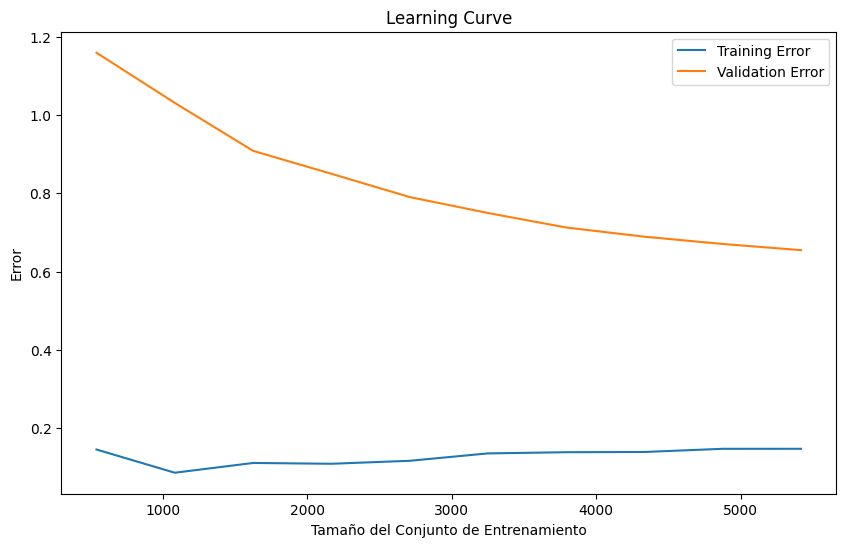

In [49]:
# 4. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    stacking_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Validation Error')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

**Métricas Relacionadas:**

Training Time: 5.501 segundos

Explained Variance Score: 0.6147

La curva de aprendizaje muestra que el error de validación disminuye y se estabiliza a medida que aumenta el tamaño del conjunto de entrenamiento.

La pequeña brecha entre las curvas de error de entrenamiento y validación indica que el modelo tiene un buen equilibrio entre sesgo y varianza, lo cual es consistente con el alto Explained Variance Score de 0.6147.

El tiempo de entrenamiento relativamente corto de 5.501 segundos sugiere que el modelo es eficiente y rápido de ajustar.

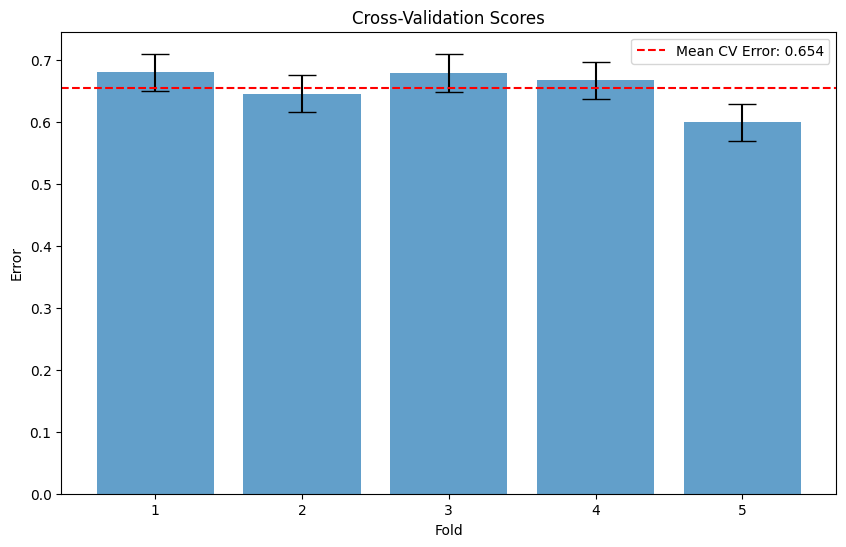

In [50]:
# 5. Cross-Validation Plot
cv_scores = cross_val_score(stacking_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_mean = -cv_scores.mean()
cv_scores_std = cv_scores.std()

plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), -cv_scores, yerr=cv_scores_std, align='center', alpha=0.7, capsize=10)
plt.axhline(y=cv_scores_mean, color='r', linestyle='--', label=f'Mean CV Error: {cv_scores_mean:.3f}')
plt.xlabel('Fold')
plt.ylabel('Error')
plt.title('Cross-Validation Scores')
plt.legend()
plt.show()

**Métricas Relacionadas:**

R^2 Score: 0.6138

Mean Squared Error (MSE): 0.6769

Los valores de cross-validation proporcionan una estimación de la capacidad de generalización del modelo.

El R^2 Score de 0.6138 y el MSE de 0.6769 son consistentes con los resultados de validación cruzada, indicando que el modelo es estable y generaliza bien a nuevos datos.

La consistencia en estas métricas sugiere que el modelo mantiene su rendimiento en diferentes subconjuntos del conjunto de datos.

## Referencias bibliográficas

* Breiman, L. (1996). Stacked regressions. Machine Learning. Recuperado de: https://doi.org/10.1007/BF00117832

* Wolpert, D. H. (1992). Stacked generalization. Neural Networks. Recuperado de: https://doi.org/10.1016/S0893-6080(05)80023-1

* Kuhn, M., & Johnson, K. (2013). Applied predictive modeling. Recuperado de: https://doi.org/10.1007/978-1-4614-6849-3

* Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Recuperado de: https://doi.org/10.1007/978-0-387-84858-7

* Breiman, L. (2001). Random forests. Machine Learning. Recuperado de: https://doi.org/10.1023/A:1010933404324

* Liaw, A., & Wiener, M. (2002). Classification and regression by randomForest. Recuperado de: https://cran.r-project.org/doc/Rnews/Rnews_2002-3.pdf